In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Save to CSV (optional, for records)
tesla_data.to_csv("tesla_data.csv", index=False)

# Display first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
import requests
import pandas as pd
# Tesla revenue data URL (from Macrotrends or similar)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# Add headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/122.0.0.0 Safari/537.36"
}
# Fetch the page content
html_data = requests.get(url, headers=headers).text
# Read all tables from the page
tables = pd.read_html(html_data)
# Find the correct revenue table
tesla_revenue = None
for table in tables:
    if "Revenue" in table.columns[1]:  # second column has 'Revenue'
        tesla_revenue = table
        break
# Clean the data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
print(tesla_revenue.tail())


    Date Revenue
11  2013  $2,013
12  2012    $413
13  2011    $204
14  2010    $117
15  2009    $112


C:\Users\amrut\AppData\Local\Temp\ipykernel_21116\3486554229.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


In [6]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Save to CSV
gme_data.to_csv("gme_data.csv", index=False)

# Display first five rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [8]:
import requests
import pandas as pd
from io import StringIO
# Correct URL
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
# Add a user-agent header to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/122.0.0.0 Safari/537.36"
}
# Get the HTML page safely
html_data = requests.get(url, headers=headers).text
# Parse tables from the HTML string
tables = pd.read_html(StringIO(html_data))
# Locate the revenue table
gme_revenue = None
for table in tables:
    if "Revenue" in table.columns[1]:
        gme_revenue = table
        break
# Clean and prepare the data
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
# Display last five rows
print(gme_revenue.tail())


    Date Revenue
12  2013  $8,887
13  2012  $9,551
14  2011  $9,474
15  2010  $9,078
16  2009  $8,806


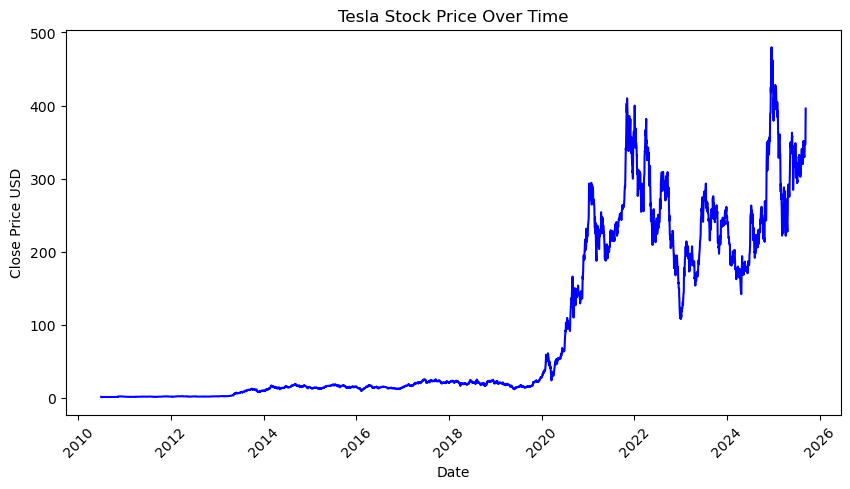

In [10]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10,5))
    plt.plot(stock_data['Date'], stock_data['Close'], color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price USD')
    plt.xticks(rotation=45)
    plt.show()
make_graph(tesla_data, "Tesla Stock Price Over Time")


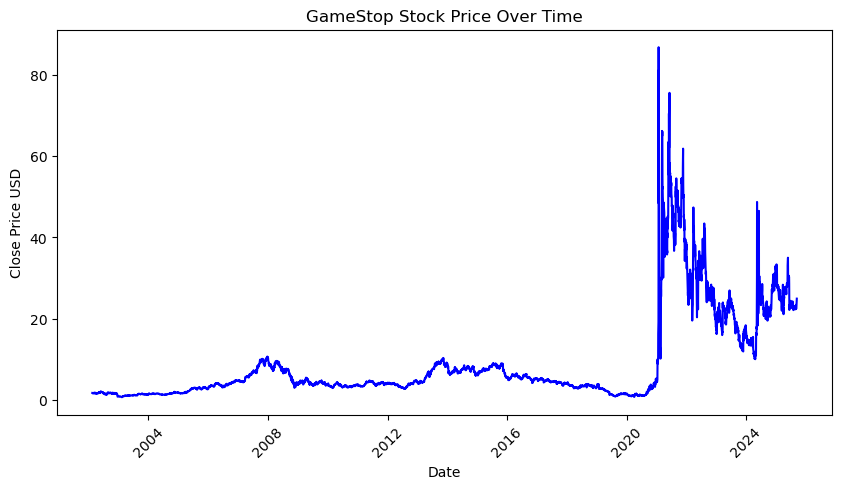

In [11]:
make_graph(gme_data, "GameStop Stock Price Over Time")